<a href="https://colab.research.google.com/github/ozgeakar/FE/blob/main/Ozge_Akarof_ADS523Finalfirstpart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/exam/ADS523Finalfirstpart.ipynb)

In [ ]:
import os
import matplotlib.pyplot as plt
from google.colab import drive
import sklearn
import numpy as np
import pandas as pd
import statsmodels     
import requests

In [ ]:
def download_data():  ### This dude will download the dataset from the directory directly!
  url = "https://raw.githubusercontent.com/yakbal-y/ds/main/tsfinal01.csv"
  res = requests.get(url, allow_redirects=True)
  with open('tsfinal01.csv','wb') as file:
    file.write(res.content)

download_data()

In [ ]:
data = pd.read_csv("tsfinal01.csv")

In [ ]:
data

,0
0,0.000000
1,0.000000
2,-0.098345
3,0.936231
4,4.507942
...,...
1495,-12356.129003
1496,-12297.581652
1497,-12236.833367
1498,-12177.658951


In [ ]:
data = data.iloc[:,-1]### we pick up the last column

1

In [ ]:
data

0           0.000000
1           0.000000
2          -0.098345
3           0.936231
4           4.507942
            ...     
1495   -12356.129003
1496   -12297.581652
1497   -12236.833367
1498   -12177.658951
1499   -12119.474682
Name: 0, Length: 1500, dtype: float64

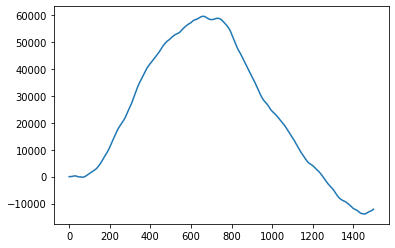

In [ ]:
plt.plot(data)

In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(data) ### it has a unit root

(-2.3425348957618666,
 0.15861622420774724,
 10,
 1489,
 {'1%': -3.4347493345634006,
  '5%': -2.863483023222698,
  '10%': -2.5678044435869762},
 6213.751764296134)

2

In [ ]:
differenced_series = data.diff()[1:].diff()[1:]

NameError: ignored

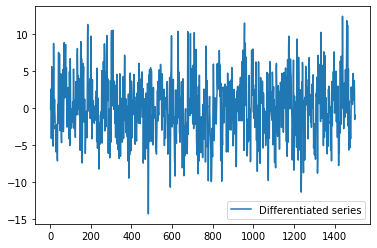

In [ ]:
plt.plot(differenced_series, label = "Differentiated series")
plt.legend()
plt.show()


In [ ]:
adfuller(differenced_series)

(-10.219369587764705,
 5.375131330487717e-18,
 8,
 1489,
 {'1%': -3.4347493345634006,
  '5%': -2.863483023222698,
  '10%': -2.5678044435869762},
 6209.68415423676)

3

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

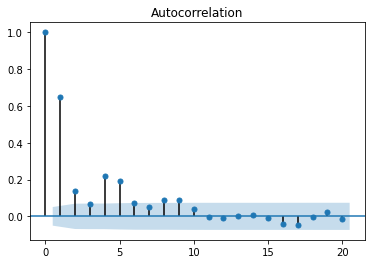

In [ ]:
plot_acf(differenced_series, lags = 20);

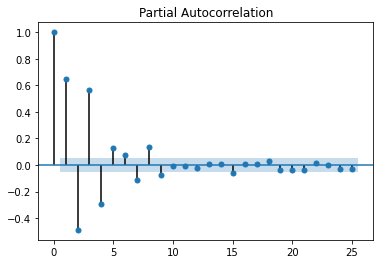

In [ ]:
plot_pacf(differenced_series, lags = 25);

4

In [ ]:
from statsmodels.tsa.stattools import arma_order_select_ic 
arma_order_select_ic(differenced_series, max_ar=10, max_ma=2, ic=["aic","bic"])

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


{'aic':               0            1            2
 0   8309.648536  7039.828974  6424.442556
 1   7491.106546  6757.552624  6424.032885
 2   7087.380890  6613.766517  6375.363464
 3   6517.543118  6396.623147  6325.097496
 4   6390.392282  6380.476969  6317.065638
 5   6370.752622  6368.630413  6318.142835
 6   6363.029672  6327.218804  6317.783127
 7   6346.958068  6323.154510  6319.757421
 8   6322.161906  6318.504676  6318.805425
 9   6316.861900  6318.736415  6320.787022
 10  6318.761950  6318.604306  6320.567077,
 'bic':               0            1            2
 0   8320.272308  7055.764632  6445.690101
 1   7507.042204  6778.800169  6450.592316
 2   7108.628434  6640.325948  6407.234781
 3   6544.102549  6428.494464  6362.280699
 4   6422.263599  6417.660172  6359.560728
 5   6407.935825  6411.125502  6365.949811
 6   6405.524761  6375.025780  6370.901989
 7   6394.765043  6376.273372  6378.188169
 8   6375.280768  6376.935424  6382.548059
 9   6375.292648  6382.479049  6389.841

3&4

In [ ]:
from statsmodels.tsa.arima.model import  ARIMA

In [ ]:
mod = ARIMA(differenced_series,  order = (3,2,7))


In [ ]:
res = mod.fit()


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      0   No. Observations:                 1498
Model:                 ARIMA(3, 2, 7)   Log Likelihood               -3169.961
Date:                Sat, 07 Jan 2023   AIC                           6361.923
Time:                        12:11:34   BIC                           6420.339
Sample:                             0   HQIC                          6383.688
                               - 1498                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1774      0.216     -5.460      0.000      -1.600      -0.755
ar.L2         -0.7944      0.128     -6.199      0.000      -1.046      -0.543
ar.L3         -0.6052      0.134     -4.516      0.000      -0.868      -0.343
ma.L1          0.6489      0.218      2.973      0.003       0.221       1.077
ma.L2         -1.0894      0.130     -8.400      0.000      -1.344      -0.835
ma.L3         -1.3803      0.205     -6.725      0.000      -1.783      -0.978
ma.L4         -0.4306      0.230     -1.875      0.061      -0.881       0.020
ma.L5          0.4723      0.113      4.173      0.000       0.250       0.694
ma.L6          0.5259      0.113      4.655      0.000       0.304       0.747
ma.L7          0.2535      0.080      3.183      0.001       0.097       0.410
sigma2         3.9995      0.152     26.333      0.000       3.702       4.297
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 2.11
Prob(Q):                              0.77   Prob(JB):                         0.35
Heteroskedasticity (H):               0.98   Skew:                             0.07
Prob(H) (two-sided):                  0.83   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
mod1 = ARIMA(differenced_series,  order = (9,2,0))

In [ ]:
res1 = mod1.fit()

In [ ]:
res1.summary() #much better solution I will use res1 as p-values are much better

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      0   No. Observations:                 1498
Model:                 ARIMA(9, 2, 0)   Log Likelihood               -3335.102
Date:                Sat, 07 Jan 2023   AIC                           6690.204
Time:                        12:11:35   BIC                           6743.309
Sample:                             0   HQIC                          6709.990
                               - 1498                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2753      0.025    -11.082      0.000      -0.324      -0.227
ar.L2         -1.1508      0.025    -45.188      0.000      -1.201      -1.101
ar.L3         -0.7648      0.036    -21.078      0.000      -0.836      -0.694
ar.L4         -0.6632      0.040    -16.512      0.000      -0.742      -0.584
ar.L5         -0.8041      0.040    -20.265      0.000      -0.882      -0.726
ar.L6         -0.4072      0.040    -10.066      0.000      -0.486      -0.328
ar.L7         -0.4596      0.038    -11.953      0.000      -0.535      -0.384
ar.L8         -0.1977      0.027     -7.414      0.000      -0.250      -0.145
ar.L9         -0.1424      0.026     -5.423      0.000      -0.194      -0.091
sigma2         5.0453      0.194     26.025      0.000       4.665       5.425
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):                 4.58
Prob(Q):                              0.44   Prob(JB):                         0.10
Heteroskedasticity (H):               1.02   Skew:                             0.11
Prob(H) (two-sided):                  0.83   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

5

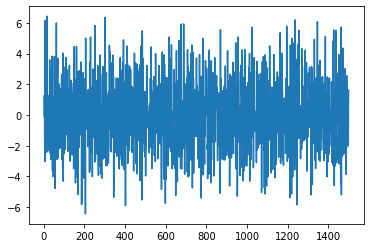

In [ ]:
residuals = res1.resid
plt.plot(residuals)

6

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
statsmodels.stats.diagnostic.acorr_ljungbox(residuals, return_df = True, model_df = 9)

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "


,lb_stat,lb_pvalue
1,0.610694,NaN
2,3.091115,NaN
3,9.474211,NaN
4,15.649165,NaN
5,28.285337,NaN
6,41.041065,NaN
7,45.898947,NaN
8,68.491808,NaN
9,69.511292,NaN
10,72.003237,2.148446e-17


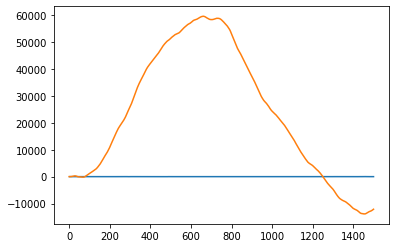

In [ ]:
plt.plot(res1.predict())
plt.plot(data) #it seems I did smt wrong, Let's try another

In [ ]:
mod1 = ARIMA(data,  order = (4,2,2))
res1 = mod1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      0   No. Observations:                 1500
Model:                 ARIMA(4, 2, 2)   Log Likelihood               -3150.557
Date:                Sat, 07 Jan 2023   AIC                           6315.114
Time:                        12:11:36   BIC                           6352.297
Sample:                             0   HQIC                          6328.967
                               - 1500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2939      0.064      4.562      0.000       0.168       0.420
ar.L2         -0.2907      0.070     -4.129      0.000      -0.429      -0.153
ar.L3          0.1127      0.063      1.776      0.076      -0.012       0.237
ar.L4          0.1544      0.046      3.376      0.001       0.065       0.244
ma.L1          1.1689      0.061     19.195      0.000       1.050       1.288
ma.L2          0.5534      0.035     15.865      0.000       0.485       0.622
sigma2         3.9216      0.146     26.840      0.000       3.635       4.208
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.96
Prob(Q):                              0.97   Prob(JB):                         0.62
Heteroskedasticity (H):               0.99   Skew:                             0.05
Prob(H) (two-sided):                  0.89   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

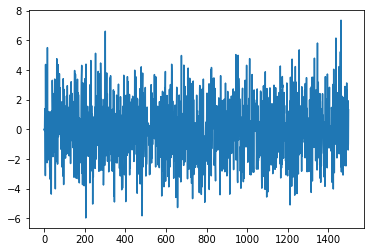

In [ ]:
residuals = res1.resid
plt.plot(residuals)

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
statsmodels.stats.diagnostic.acorr_ljungbox(residuals, return_df = True, model_df = 11)

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "


,lb_stat,lb_pvalue
1,0.001747,NaN
2,0.113377,NaN
3,0.142000,NaN
4,0.156681,NaN
5,0.195886,NaN
6,1.245541,NaN
7,2.600995,NaN
8,3.326245,NaN
9,3.367957,NaN
10,6.078633,NaN


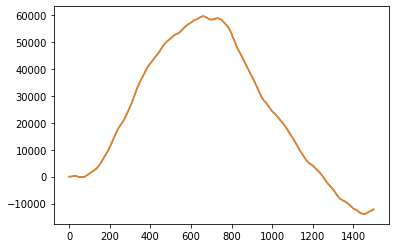

In [ ]:
plt.plot(res1.predict())
plt.plot(data) #perfect this time with (4,2,2)